In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat, savemat
from scipy.interpolate import interp1d

def db2mag(db): return np.power(10, db/20)

In [2]:
# section for fitting. no need to install
from resonator_tools import circuit
from resonator_tools.circuit import notch_port

In [3]:
global_address = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Power_sweep\Raw_data" 
sample_folders = os.listdir(global_address)
for i in range(len(sample_folders)):
    if ".PNG" in sample_folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_folders[i]) 

[1] -----------> S11W6
[2] -----------> S18W11
[3] -----------> S5W2.7
[4] -----------> S7W4


<div style="text-align: center; font-size: 45px; color: blue;">
    S5W2.7
</div>

# get reference

In [4]:
sample = 3
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> 20db_room_att
[1] -----------> full_band_reference.mat
[2] -----------> High_power
[3] -----------> High_power_2nd_cooldown


(10000,)
(10000,)
(10000,)


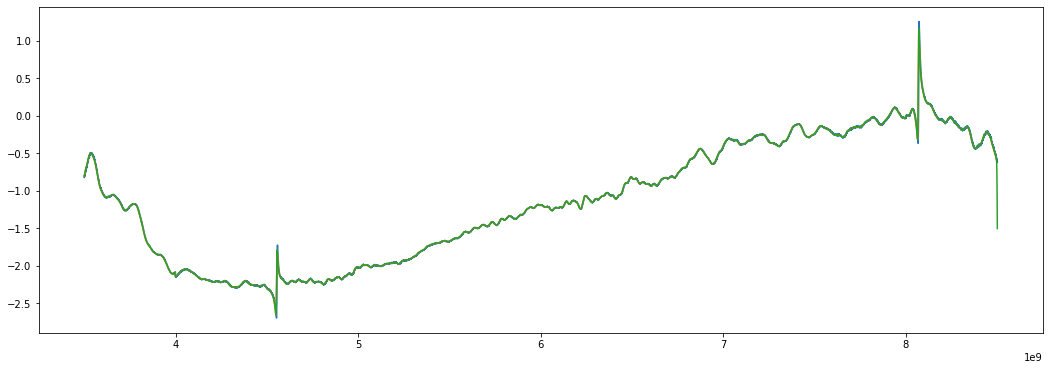

In [7]:
file_address = sample_address+"\\"+sample_measurements[1]
mat = loadmat(file_address)
phas_ref = mat['phas'][0]
print(phas_ref.shape)
mags_ref = mat['mags'][0]
print(mags_ref.shape)
freqs_ref = mat['freq'][0]
print(freqs_ref.shape)

def moving_average(y, window_size=5):
    return np.convolve(y, np.ones(window_size)/window_size, mode='valid')

smoothed_mags = moving_average(mags_ref, window_size=10)
smoothed_phas = moving_average(phas_ref, window_size=10)
smoothed_freqs = freqs_ref[:len(smoothed_mags)] 

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(freqs_ref, phas_ref)
ax.plot(smoothed_freqs, smoothed_phas)

interp_func_mag = interp1d(smoothed_freqs, smoothed_mags, kind='cubic', fill_value='extrapolate')
interp_func_pha = interp1d(smoothed_freqs, smoothed_phas, kind='cubic', fill_value='extrapolate')
mags_ref = interp_func_mag(freqs_ref)
phas_ref = interp_func_pha(freqs_ref)

ax.plot(freqs_ref, phas_ref)

# Fit

In [165]:
sample = 1
sample_address = global_address+"\\"+sample_folders[sample]
sample_measurements = os.listdir(sample_address)
for i in range(len(sample_measurements)):
    if ".PNG" in sample_measurements[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurements[i]) 

[0] -----------> 20db_room_att
[1] -----------> full_band_reference.mat
[2] -----------> High_power
[3] -----------> High_power_2nd_cooldown


In [166]:
measurement = 0
sample_measurement_address = sample_address+"\\"+sample_measurements[measurement]
sample_measurement_data = os.listdir(sample_measurement_address)
for i in range(len(sample_measurement_data)):
    if ".PNG" in sample_measurement_data[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', sample_measurement_data[i]) 

[0] -----------> POWER_SCAN_res_0.mat
[1] -----------> POWER_SCAN_res_1.mat
[2] -----------> POWER_SCAN_res_2.mat
[3] -----------> POWER_SCAN_res_3.mat
[4] -----------> POWER_SCAN_res_4.mat
[5] -----------> POWER_SCAN_res_5.mat
[6] -----------> POWER_SCAN_res_6.mat
[7] -----------> POWER_SCAN_res_7.mat
[8] -----------> POWER_SCAN_res_8.mat


In [167]:
resonator = 0
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
mat.keys()

Data\Power_sweep\Raw_data\S11W6\20db_room_att\POWER_SCAN_res_0.mat


dict_keys(['__header__', '__version__', '__globals__', 'cent_freq', 'span', 'star_freq', 'stop_freq', 'nop', 'elength', 'band', 'power', 'avg_status', 'avgs', 'temp_mK', 'additional_room_attenuation', 'freqs', 'mags', 'phas', 'powers'])

In [168]:
powers = mat['powers'][0]
print(powers.shape)
phas = mat['phas']
print(phas.shape)
mags = mat['mags']
print(mags.shape)
freqs = mat['freqs'][0]
print(freqs.shape)

(31,)
(31, 5001)
(31, 5001)
(5001,)


In [169]:
len(powers)

31

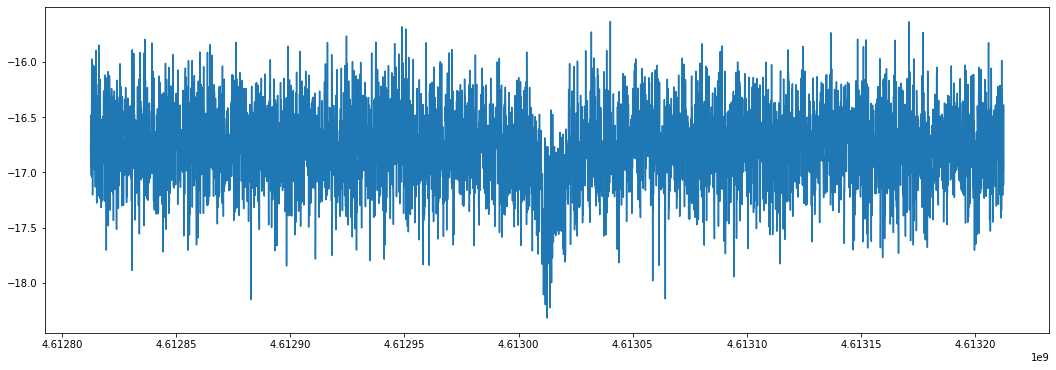

In [170]:
fig, ax = plt.subplots(figsize=(18, 6))

mask = (freqs_ref >= freqs.min()-5e6) & (freqs_ref <= freqs.max()+5e6)
freqs_ref_subset = freqs_ref[mask]
mag_ref_subset = mags_ref[mask]
pha_ref_subset = phas_ref[mask]

# Interpolate to match freqs
interp_func_mag = interp1d(freqs_ref_subset, mag_ref_subset, kind='cubic', fill_value='extrapolate')
interp_func_pha = interp1d(freqs_ref_subset, pha_ref_subset, kind='cubic', fill_value='extrapolate')

mag_ref_interpolated = interp_func_mag(freqs)
pha_ref_interpolated = interp_func_pha(freqs)


ax.plot(freqs, mags[0]-mag_ref_interpolated)
# ax.plot(freqs, mag_ref_interpolated, '.')

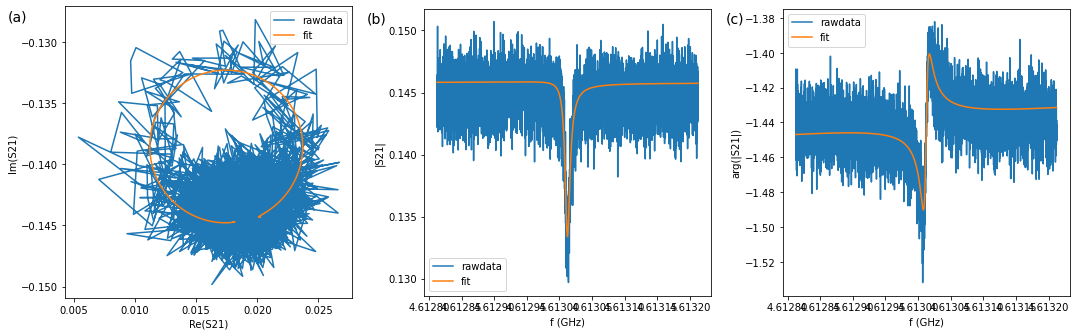

{'Qi_dia_corr': 537189.8654077254,
 'Qi_no_corr': 537695.8649537656,
 'absQc': 5748669.344282296,
 'Qc_dia_corr': 5807150.511432594,
 'Ql': 491704.766192338,
 'fr': 4613012063.547621,
 'theta0': -2.9996144134880542,
 'phi0': 0.14203867500324596,
 'phi0_err': 0.03209055656485166,
 'Ql_err': 22259.101168669426,
 'absQc_err': 190670.46089367958,
 'fr_err': 217.56224527645134,
 'chi_square': 0.0003468364552398756,
 'Qi_no_corr_err': 25467.463015617646,
 'Qi_dia_corr_err': 25439.27258059162}

In [173]:
# testing fit
# %matplotlib qt
power_num = 5
S21 = db2mag(mags[power_num]-mag_ref_interpolated)*np.exp(1j*(phas[power_num]-pha_ref_interpolated))
port1 = notch_port(freqs, S21)
port1.autofit()
port1.plotall()
port1.fitresults

# Fit all powers for all resonators

In [224]:
resonator = 9
file_address = sample_measurement_address+"\\"+sample_measurement_data[resonator]
print(file_address[60:])
mat = loadmat(file_address)
powers = mat['powers'][0]
print(powers.shape)
phas = mat['phas']
print(phas.shape)
mags = mat['mags']
print(mags.shape)
freqs = mat['freqs'][0]
print(freqs.shape)


resonanse_freq = np.array([])
resonanse_ql = np.array([])
resonanse_qc = np.array([])
resonanse_qi = np.array([])

resonanse_freq_err = np.array([])
resonanse_ql_err = np.array([])
resonanse_qc_err = np.array([])
resonanse_qi_err = np.array([])

good_powers = np.array([])
for p in range(len(powers)):

    S21 = db2mag(mags[p]-mag_ref_interpolated)*np.exp(1j*(phas[p]-pha_ref_interpolated))
    port1 = notch_port(freqs, S21)
    port1.autofit()
    port1.plotall()
    
    if port1.fitresults['Ql_err']/port1.fitresults['Ql']<0.3 and port1.fitresults['Ql_err']<1e11:
        good_powers = np.append(good_powers, powers[p])
        resonanse_freq = np.append(resonanse_freq, port1.fitresults['fr'])
        resonanse_ql = np.append(resonanse_ql, port1.fitresults['Ql'])
        resonanse_qc = np.append(resonanse_qc, port1.fitresults['absQc'])
        resonanse_qi = np.append(resonanse_qi, port1.fitresults['Qi_no_corr'])

        resonanse_freq_err = np.append(resonanse_freq_err, port1.fitresults['fr_err'])
        resonanse_ql_err = np.append(resonanse_ql_err, port1.fitresults['Ql_err'])
        resonanse_qc_err = np.append(resonanse_qc_err, port1.fitresults['absQc_err'])
        resonanse_qi_err = np.append(resonanse_qi_err, port1.fitresults['Qi_no_corr_err'])

IndexError: list index out of range

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Powers, db')
plt.ylabel('Res freq, GHz')
plt.title(r'$f_r(P)$')
plt.grid()

plt.errorbar(good_powers, resonanse_freq/1e9, yerr=resonanse_freq_err/1e9, fmt='o', label='Data with error bars', color='blue', capsize=5)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Powers, db')
plt.ylabel('$Q_l$')
plt.title(r'$Q_l(P)$')
plt.grid()

plt.errorbar(good_powers, resonanse_ql, yerr=resonanse_ql_err, fmt='o', label='Data with error bars', color='green', capsize=5)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Powers, db')
plt.ylabel('$Q_c$')
plt.title(r'$Q_c(P)$')
plt.grid()

plt.errorbar(good_powers, resonanse_qc, yerr=resonanse_qc_err, fmt='o', label='Data with error bars', color='red', capsize=5)
plt.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.xlabel('Powers, db')
plt.ylabel('$Q_i$')
plt.title(r'$Q_i(P)$')
plt.grid()

plt.errorbar(good_powers, resonanse_qi, yerr=resonanse_qi_err, fmt='o', label='Data with error bars', color='purple', capsize=5)
plt.legend()

# Save each resonator fitting data separatelly

In [ ]:
file_directory = r"C:\Users\mukha\Documents\Python Scripts\Kantele\Kantele_git\Data\Power_sweep\Fitted_data" 
sample = "S5W2.7"
meas = "20db_room_att"
file_name = "Circlefit_res_" + str(resonator) + ".mat"
sample_address = file_directory+"\\"+sample+"\\"+meas+"\\"+file_name

fitting_state = dict()
fitting_state['resonanse_freq'] = resonanse_freq
fitting_state['resonanse_ql'] = resonanse_ql
fitting_state['resonanse_qc'] = resonanse_qc
fitting_state['resonanse_qi'] = resonanse_qi
fitting_state['resonanse_freq_err'] = resonanse_freq_err
fitting_state['resonanse_ql_err'] = resonanse_ql_err
fitting_state['resonanse_qc_err'] = resonanse_qc_err
fitting_state['resonanse_qi_err'] = resonanse_qi_err

fitting_state['good_powers'] = good_powers-22

fitting_state['mag_ref_interpolated'] = mag_ref_interpolated
fitting_state['pha_ref_interpolated'] = pha_ref_interpolated

fitting_state['original_file'] = file_address
fitting_state['additional_room_attenuation'] = 0
fitting_state['sample'] = sample


savemat(sample_address, fitting_state)